In [97]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import datetime as dt

In [98]:
me = 'yusuf'

In [99]:
class Message:
    def __init__(self,author, message, timestamp):
        self.author = author
        self.message = message
        da,ti = timestamp.split()
        d,m,y = map(int,da.split('.'))
        h,mi,s = map(int,ti.split(':'))
        self.timestamp = datetime(y,m,d,h,mi,s)
    def __repr__(self):
        return f"[{self.author}]"
    def __eq__(self, other):
        if other is Message:
            return self.author == other.author
        else:
            return self.author == other
    def __hash__(self):
        return hash(self.author)
    

In [100]:
class WPChatParser:
    message_regex = '\ *\[([0-9]{0,2}\.[0-9]{0,2}\.[0-9]{0,4}\ [0-9]{0,2}:[0-9]{0,4}:[0-9]{0,4})\]\ ([\.ÇçĞğIıİÖöŞşÜüA-z 0-9]+)\:'
    messages = []
    def __init__(self, chat_path=None, parse_messages = True):
        self.chat_path = chat_path
        if chat_path:
            raw_text = self.load_messages()
            if parse_messages:
                self.messages = self.parse_messages(raw_text)
        
    def load_messages(self):
        text = ''
        with open(self.chat_path, 'r') as f:
            text = f.read()
        return text
    
    def parse_messages(self, raw_text):
        tmp = re.split(self.message_regex,raw_text)
        messages = []
        for i in range(1, len(tmp), 3):
            timestamp = tmp[i]
            author = tmp[i+1]
            if author.endswith('[cmpe]'):
                author = author[:-len('[cmpe]')]
            
            messages.append(Message(author, tmp[i+2], timestamp))
        return messages
    def filter_by_time(self, begin,end):
        return list(filter(lambda x: (x.timestamp <= end and x.timestamp >= begin) ,self.messages ))

        


In [101]:
class ChatStatistics:
    def __init__(self, messages):
        self.messages = messages
        self.counter = self._classify_by_author()
        self.authors = list(map(lambda x : x.author,self.counter.keys()))
        self.author_message_dict = self._classify_messages_by_author()
        
    def _classify_by_author(self):
        return Counter(self.messages)
    
    def plot_statistics(self,x_labels, frequencies, title = '', y_label='', titlesize =25, figure_size = (16, 9)):
        freq_series = pd.Series(frequencies)
        plt.figure(figsize=figure_size)
        ax = freq_series.plot(kind="bar")
        ax.set_title(title, fontsize = titlesize)
        ax.set_ylabel(y_label,fontsize = 20)
        ax.set_xticklabels(x_labels,fontsize = 16)
        plt.show()
    
    def _classify_messages_by_author(self):
        tmp = {author: [] for author in self.authors}
        for message in self.messages:
            if message.author in tmp:
                tmp[message.author].append(message.message)
        return tmp
        
        
    def message_count_statistic(self):
        c = self.counter
        freq = []
        names = []
        tot_mes_count = sum(c.values())
        for name, count in reversed(c.most_common()):
            p = round(count/tot_mes_count*100 , 1)
            if name.author == me:
                p += 3.1
            names.append(name.author)
            freq.append(p)
        return names,freq
    
    def message_length_statistic(self, cutoff = 69):
        tmp = []
        tot_mes_length = 0
 
        for name in self.authors:
            f = sum(map(lambda x: len(x) if len(x)< cutoff else 0, self.author_message_dict[name]))
            tot_mes_length += f   
            tmp.append((f,name))
        tmp.sort()
        names = [i[1] for i in tmp]
        freq = [i[0]/f for i in tmp]
        try:
            i = names.index(me)
            freq[i]+= 3.1
        except:
            pass
        
        return names ,freq

       

        

In [102]:
ard = WPChatParser('_chat.txt')

In [103]:
st = ChatStatistics(ard.messages)

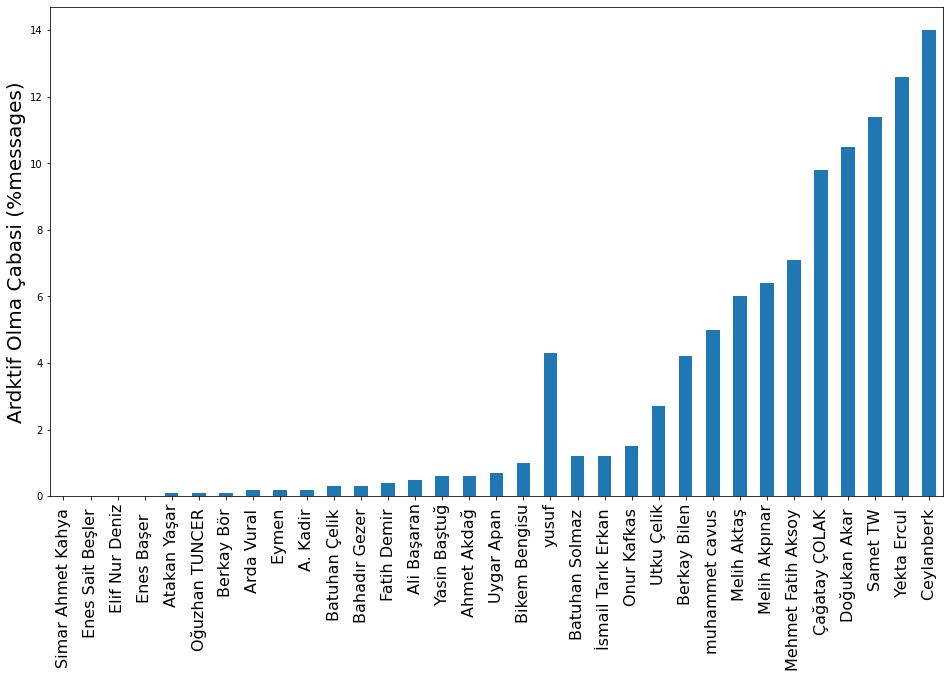

In [104]:
names, frequencies = st.message_count_statistic()
st.plot_statistics(x_labels = names, frequencies=frequencies, y_label="Ardktif Olma Çabasi (%messages)" )

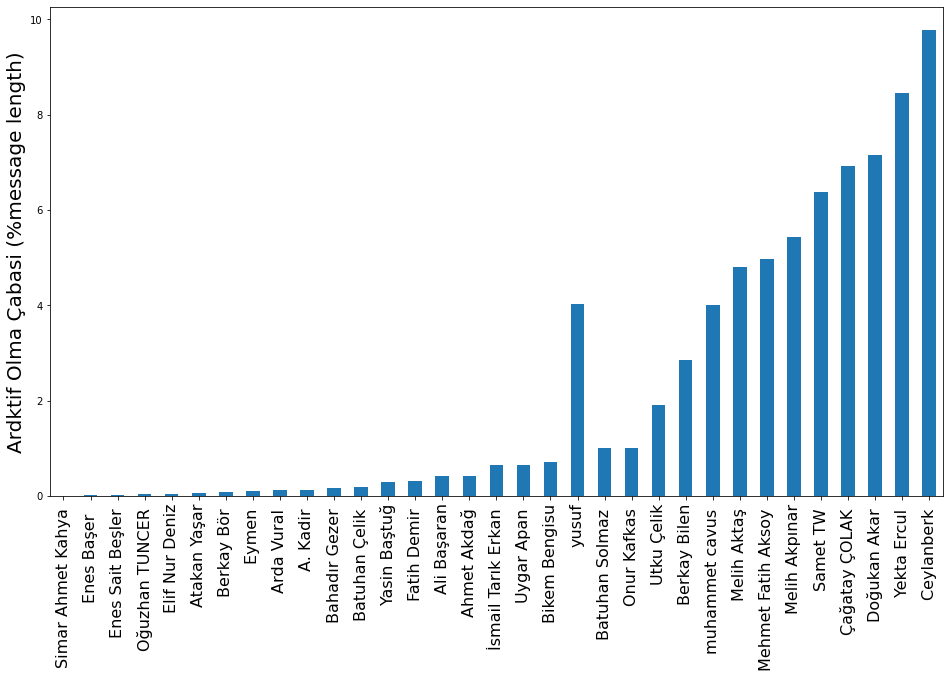

In [105]:
names, frequencies = st.message_length_statistic(cutoff=69)
st.plot_statistics(x_labels = names, frequencies=frequencies, y_label="Ardktif Olma Çabasi (%message length)" )

In [106]:
now = datetime.today()
begin = now -  dt.timedelta(days = 1)
end = now + dt.timedelta(days = 1)

In [107]:
tmp = ard.filter_by_time(begin, end)
st2 = ChatStatistics(tmp, )

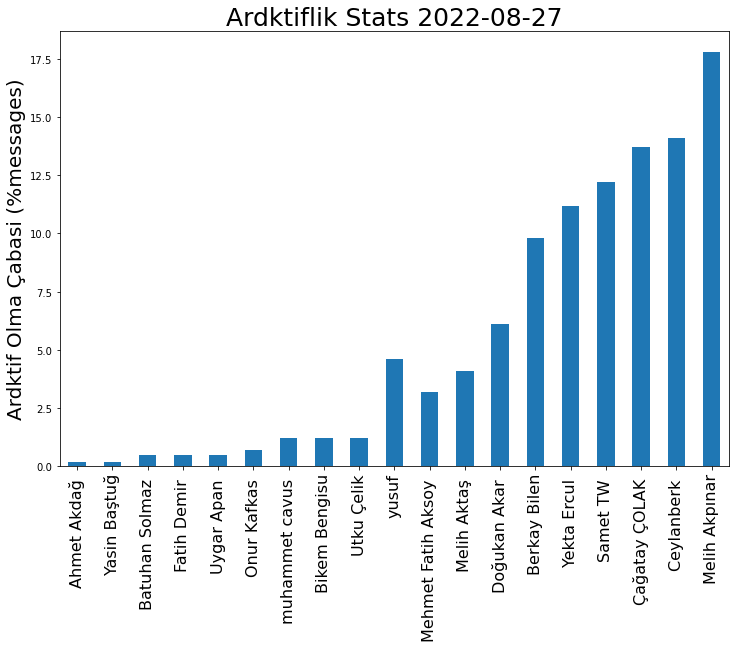

In [113]:
names, frequencies = st2.message_count_statistic()
st2.plot_statistics(x_labels = names, frequencies=frequencies, y_label="Ardktif Olma Çabasi (%messages)", title = f"Ardktiflik Stats {now.date()}", figure_size= (12,8) )

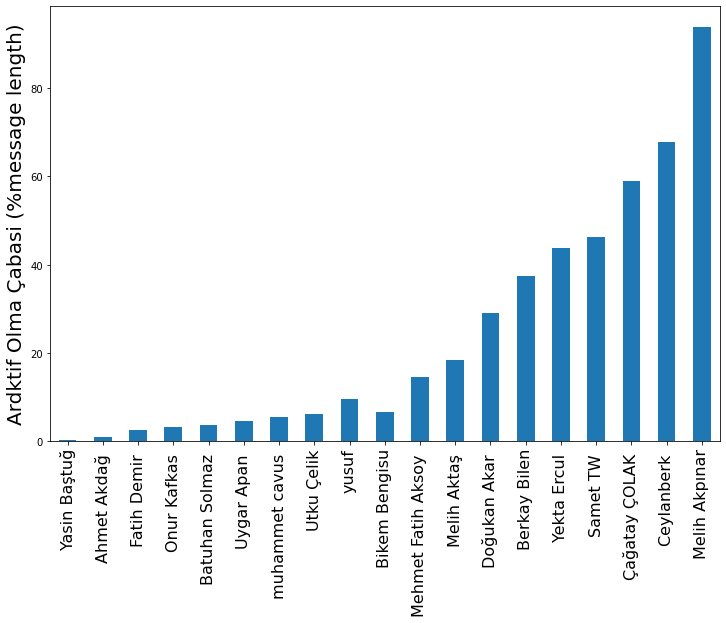

In [114]:
names, frequencies = st2.message_length_statistic(cutoff=69)
st.plot_statistics(x_labels = names, frequencies=frequencies, y_label="Ardktif Olma Çabasi (%message length)", figure_size= (12,8) )